# Task 2.4- Evaluating Hyperparameters

## 1. Importing Libraries and Data

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [166]:
# Create path variable for re-use when importing data
path = r'C:\Users\sorca\Documents\3ML-2_3\Task'

In [167]:
# Load climate dataframe
df_climate = pd.read_csv(os.path.join(path,'Climate_cleaned.csv'), index_col = False)

In [168]:
df_climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14              

In [169]:
df_climate.shape

(22950, 135)

In [170]:
# Load "pleasant" dataframe
df_pleasant = pd.read_csv(os.path.join(path,'Pleasant_cleaned.csv'), index_col = False)

In [171]:
df_pleasant.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [172]:
df_pleasant.shape

(22950, 15)

## 2. Data Wrangling

In [174]:
# Keep rows for climate data frame where index is between 19298 and 22950 (inclusive) which represent 
# the previous 10 years of data ( 22949-(365x10+2)) # Oct 2012 - Oct 2022
df_climate_10yrs = df_climate.loc[19297:22949]

In [175]:
df_climate_10yrs

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
19297                  5            0.82          1.0018   
19298                  7            0.74          0.9941   
19299                  5            0.65          1.0041   
19300                  6            0.56          1.0044   
19301                  8            0.92          1.0041   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
19297                    0.91                 0.00             4.4   
19298                    0.84                 0.12             3.8   
19299                    0.76                 0.40             2.6   
19300                    0.93                 0.71             5.4   
19301                    0.35                 1.76             0.0   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
19297              4.3             0.2             8.5                     2   
19298              8.7             4.7            15.2                     6   
19299             10.7             7.2            15.6                     4   
19300             15.2             9.1            19.8                     2   
19301              9.6             7.5            12.7                     2   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
19297               0.67             1.0145                       1.23   
19298               0.81             1.0024                       0.67   
19299               0.74             1.0079                       1.13   
19300               0.72             1.0159                       1.11   
19301               0.59             1.0137                       1.15   
...                  ...                ...                        ...   
22945               0.68             1.0278                       1.57   
22946               0.68             1.0295                       1.57   
22947               0.68             1.0278                       1.57   
22948               0.68             1.0238                       1.57   
22949               0.68             1.0235                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
19297                    0.24                7.5                 8.0   
19298                    0.38                1.8                12.5   
19299                    0.23                6.6                15.2   
19300                    0.00                6.5                14.4   
19301                    0.00                7.2                16.9   
...                       ...                ...                 ...   
22945                    0.18                5.7                18.2   
22946              

In [176]:
# Keep rows for 'pleasant' data frame where index is between 19298 and 22950 (inclusive) which represent 
# the previous 10 years of data ( 22949-(365x10+2))
df_pleasant_10yrs = df_pleasant.loc[19297:22949]

In [177]:
df_pleasant_10yrs

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
19297                       0                          0   
19298                       0                          0   
19299                       0                          0   
19300                       0                          1   
19301                       0                          1   
...                       ...                        ...   
22945                       0                          0   
22946                       0                          0   
22947                       0                          0   
22948                       0                          0   
22949                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
19297                          0                        0   
19298                          0                        0   
19299                          0                        0   
19300                          0                        0   
19301                          0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
19297                            0                          0   
19298                            0                          0   
19299                            0                          0   
19300                            0                          0   
19301                            0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
19297                        0                           0   
19298                        0                           0   
19299                        0                           0   
19300                        0                           0   
19301                        0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
19297                            0                        0   
19298                            0                        0   
19299                            0                        0   
19300                            0                        0   
19301                            0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
19297                          0                      0   
19298                          0                      0   
19299                          0                      0   
19300                          1  

## 3. Reshaping for modeling

In [179]:
# Reshape X and y from a df to arrays
X = np.array(df_climate_10yrs)
y = np.array(df_pleasant_10yrs)

In [180]:
X.shape

(3653, 135)

In [181]:
y.shape

(3653, 15)

## 4. Split the data

In [183]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [184]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


In [185]:
X_train

array([[ 7.    ,  0.83  ,  1.0309, ..., 10.7   ,  7.9   , 13.5   ],
       [ 4.    ,  0.73  ,  1.0431, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.73  ,  1.0214, ..., 10.7   ,  7.9   , 13.5   ],
       ...,
       [ 6.    ,  0.68  ,  1.027 , ..., 10.7   ,  7.9   , 13.5   ],
       [ 6.    ,  0.74  ,  1.0122, ..., 10.7   ,  7.9   , 13.5   ],
       [ 5.    ,  0.75  ,  1.0173, ..., 10.7   ,  7.9   , 13.5   ]])

## 5. Random Forest Model - Hyperparameter Optimization

### Grid Search

In [188]:
# Create a RF classifier
clf = RandomForestClassifier() # no n_estimators are specified at this time

In [189]:
grid_space = {
    'max_depth': [3, 10, None],
    'n_estimators': [50, 100],
    'max_features': [15, 50],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3]
}

In [190]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 1.264987059434255 minutes


In [191]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 0.6677619569185834


### Random Search

In [193]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [194]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [195]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 3.5503744006156923 minutes


In [196]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 56, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 260}
Best RANDOM search score is: 0.6611902154070829


##### Note: The search score is slightly higher for Grid Search (0.6644 vs 0.6622), so will use the hyperparamenters for Grid Search

## 6. Running Random Forest Model with Optimized Search Parameters

#### 6.1 All weather stations and only a decade of data.
##### 6.1.1 Create the tree diagram

In [200]:
# Create a RF classifier with the best results from above
#  'max_depth': None, 'max_features': 50, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100 
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=None, max_features=50, min_samples_leaf=2, min_samples_split=3)  

# Training the model on the training dataset
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=50, min_samples_leaf=2, min_samples_split=3)

In [201]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6936542669584245


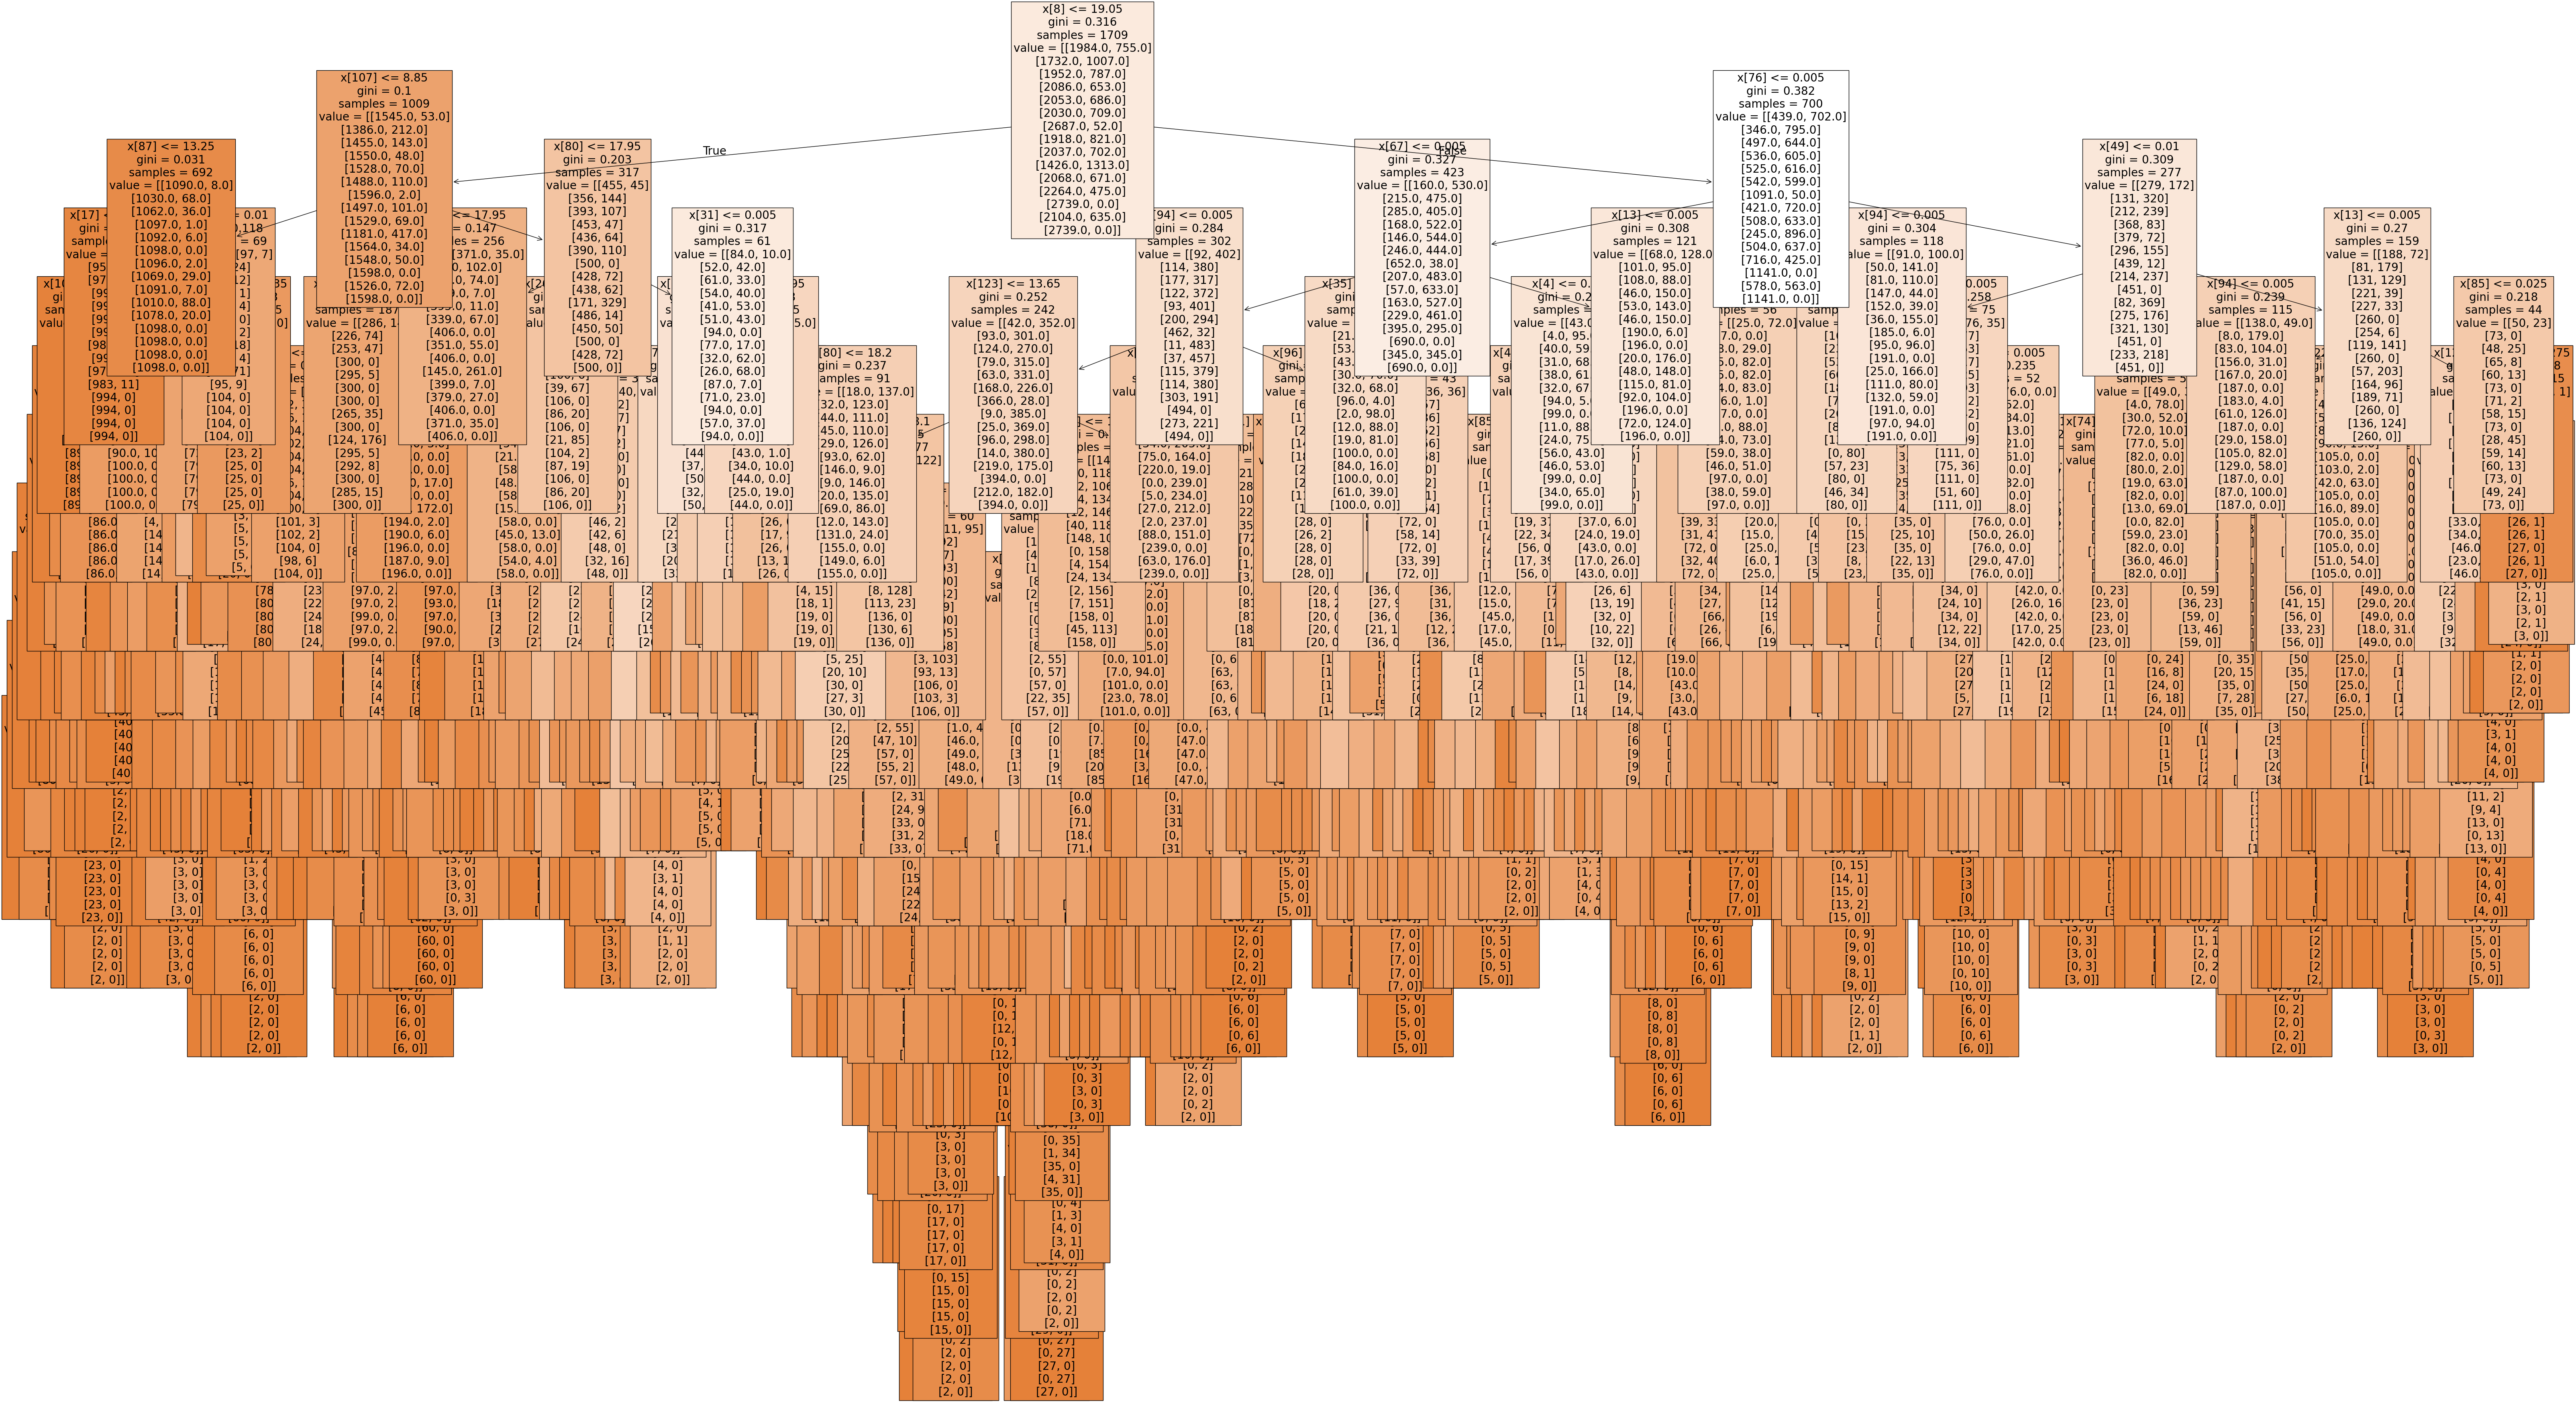

In [202]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=['unpleasant', 'pleasant'], filled=True);

In [203]:
fig.savefig(f"{path}/All weather stations for a decade.png")

##### 6.1.2 Feature Importances

In [241]:
# Retrieve feature importances from the trained model
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.19584965e-03, 2.04921496e-03, 1.41982890e-03, 1.71066232e-03,
       3.13279009e-02, 4.07954037e-03, 5.24509519e-03, 1.24480565e-03,
       5.17900352e-02, 2.11261884e-03, 1.31372353e-03, 1.84241028e-03,
       1.00030332e-03, 3.24587120e-02, 1.79513357e-03, 3.33347380e-03,
       1.69570476e-03, 9.42442798e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.75485124e-02, 8.26031126e-07,
       4.88218528e-03, 1.93785098e-03, 1.78942302e-02, 9.14291210e-04,
       1.46313756e-03, 2.39958276e-03, 1.82544659e-03, 2.36678669e-02,
       2.44206444e-03, 2.03512969e-03, 1.39206739e-03, 4.54111534e-02,
       8.84521799e-04, 1.37293546e-03, 2.20379229e-03, 1.68382781e-03,
       3.83783718e-02, 2.13768927e-03, 4.76247787e-03, 1.33873735e-03,
       1.30991555e-01, 1.41058405e-03, 2.38724341e-03, 2.24379291e-03,
       2.03548156e-03, 1.52391998e-02, 2.99371067e-03, 2.49412572e-03,
       1.40470262e-03, 9.24581181e-03, 9.43997167e-04, 2.95273163e-04,
      

In [243]:
# Reshape newarray
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.19584965e-03, 2.04921496e-03, 1.41982890e-03, 1.71066232e-03,
         3.13279009e-02, 4.07954037e-03, 5.24509519e-03, 1.24480565e-03,
         5.17900352e-02],
        [2.11261884e-03, 1.31372353e-03, 1.84241028e-03, 1.00030332e-03,
         3.24587120e-02, 1.79513357e-03, 3.33347380e-03, 1.69570476e-03,
         9.42442798e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         3.75485124e-02, 8.26031126e-07, 4.88218528e-03, 1.93785098e-03,
         1.78942302e-02],
        [9.14291210e-04, 1.46313756e-03, 2.39958276e-03, 1.82544659e-03,
         2.36678669e-02, 2.44206444e-03, 2.03512969e-03, 1.39206739e-03,
         4.54111534e-02],
        [8.84521799e-04, 1.37293546e-03, 2.20379229e-03, 1.68382781e-03,
         3.83783718e-02, 2.13768927e-03, 4.76247787e-03, 1.33873735e-03,
         1.30991555e-01],
        [1.41058405e-03, 2.38724341e-03, 2.24379291e-03, 2.03548156e-03,
         1.52391998e-02, 2.99371067e-03, 2.49412572e-03, 1.40470262

In [245]:
# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10006293, 0.05497651, 0.0622636 , 0.08155074, 0.18375391,
       0.03945465, 0.00392317, 0.07902844, 0.15480915, 0.07483301,
       0.06896552, 0.0430331 , 0.0138197 , 0.03832562, 0.00119996])

In [247]:
df_climate.columns.tolist()

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [249]:
cities = [
    'Basel',
    'Belgrade',
    'Budapest',
    'Debilt',
    'Dusseldorf',
    'Heathrow',
    'Kassel',
    'Ljubljana',
    'Maastricht',
    'Madrid',
    'Munchenb',
    'Oslo',
    'Sonnblick',
    'Stockholm',
    'Valentia'
]

In [253]:
important = pd.Series(sumarray, index = cities)
important = important.sort_values(ascending = False)
important

Dusseldorf    0.183754
Maastricht    0.154809
Basel         0.100063
Debilt        0.081551
Ljubljana     0.079028
Madrid        0.074833
Munchenb      0.068966
Budapest      0.062264
Belgrade      0.054977
Oslo          0.043033
Heathrow      0.039455
Stockholm     0.038326
Sonnblick     0.013820
Kassel        0.003923
Valentia      0.001200
dtype: float64

In [255]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': cities,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)
df_importance

Weather Station  Importance
4       Dusseldorf    0.183754
8       Maastricht    0.154809
0            Basel    0.100063
3           Debilt    0.081551
7        Ljubljana    0.079028
9           Madrid    0.074833
10        Munchenb    0.068966
2         Budapest    0.062264
1         Belgrade    0.054977
11            Oslo    0.043033
5         Heathrow    0.039455
13       Stockholm    0.038326
12       Sonnblick    0.013820
6           Kassel    0.003923
14        Valentia    0.001200

['Basel', 'Belgrade', 'Budapest', 'Debilt', 'Dusseldorf', 'Heathrow', 'Kassel', 'Ljubljana', 'Maastricht', 'Madrid', 'Munchenb', 'Oslo', 'Sonnblick', 'Stockholm', 'Valentia']


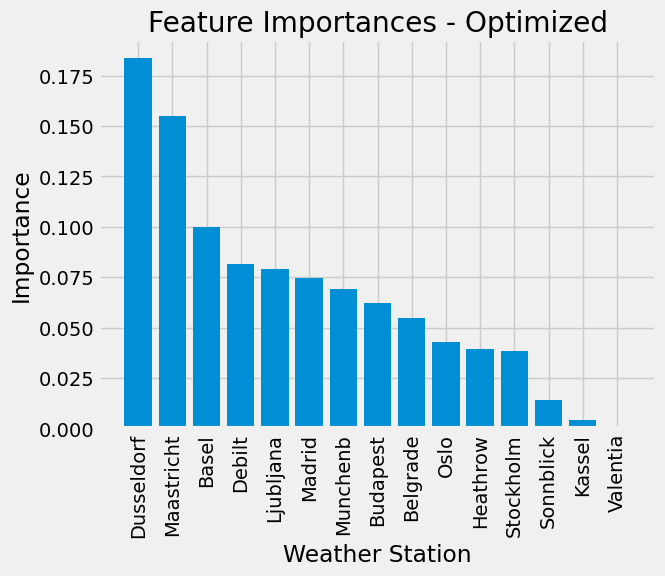

In [261]:
%matplotlib inline

plt.style.use('fivethirtyeight')
print(cities)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Feature Importances - Optimized')

plt.savefig(os.path.join(path,'AWS Feature_Importances-Optimized.png'), bbox_inches='tight')

plt.show()

#### 6.2 Maastricht weather station and all of the data.
##### 6.2.1 Create the tree diagram

In [388]:
# Create the dataset for Dusseldorf

In [390]:
df_climate.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0            10.9                     1               0.81             1.0195   
1            10.1                     6               0.84             1.0172   
2             9.9                     6               0.77             1.0179   
3            10.6                     8               0.93             1.0268   
4             6.0                     8               0.99             1.0286   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                       0.88                    0.00                7.0   
1                       0.25                    0.00                0.0   
2                       0.67                    0.00                3.5   
3                       0.25                    0.00                0.0   
4                       0.25                    0.06                0.0   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   
3                 2.0               -2.0                3.0   
4                 2.0                0.7                2.8   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0                 2.4               -0.4                5.1   
1                 2.3                1.4                3.1   
2                 2.7                1.7                5.3   
3                 2.0                0.4                4.4   
4                 2.5                1.1                5.3   

   DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                   7             0.85           1.0032   
1                   8             0.90           1.0056   
2                   6             0.92           1.0165   
3                   8             0.95           1.0265   
4                   6             0.90           1.0243   

   DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                     0.07                  0.25              0.0   
1                     0.14              

In [392]:
# Filter climate dataset to only include Dusseldorf
df_climate_maas = df_climate[df_climate.columns[df_climate.columns.astype(str).str.startswith('MAASTRICHT')]]

# Check output
df_climate_maas.head()

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                       7                 0.83               1.0063   
1                       8                 0.92               1.0062   
2                       7                 0.97               1.0167   
3                       7                 0.89               1.0277   
4                       7                 0.92               1.0259   

   MAASTRICHT_global_radiation  MAASTRICHT_precipitation  MAASTRICHT_sunshine  \
0                         0.22                      0.32                  1.0   
1                         0.17                      1.34                  0.4   
2                         0.12                      0.46                  0.0   
3                         0.16                      0.00                  0.3   
4                         0.12                      0.56                  0.0   

   MAASTRICHT_temp_mean  MAASTRICHT_temp_min  MAASTRICHT_temp_max  
0                   9.5                  8.5                 11.1  
1                   8.6                  7.5                  9.9  
2                   6.9                  5.5                  9.9  
3                   7.0                  3.0                 10.0  
4                   8.1                  2.5                 11.1

In [394]:
df_climate_maas.shape

(22950, 9)

In [396]:
# Filter pleasant dataset to only include Maastricht
df_pleasant_maas = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('MAASTRICHT')]]

# Check output
df_pleasant_maas.head()

MAASTRICHT_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0

In [398]:
# Reshape X and y from a df to arrays
X = np.array(df_climate_maas)
y = np.array(df_pleasant_maas)

In [400]:
X.shape

(22950, 9)

In [402]:
y.shape

(22950, 1)

In [404]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [406]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212, 1)
(5738, 9) (5738, 1)


In [408]:
X_train

array([[  3.    ,   0.71  ,   1.0144, ...,  17.7   ,  11.1   ,  23.    ],
       [  4.    ,   0.76  ,   1.0171, ...,  -3.8   ,  -8.    ,   0.4   ],
       [  5.    ,   0.92  ,   1.0108, ...,  -6.1   , -11.    ,  -3.1   ],
       ...,
       [  7.    ,   0.88  ,   1.0096, ...,   7.3   ,   3.5   ,   9.1   ],
       [  6.    ,   0.77  ,   1.0134, ...,  10.4   ,   8.4   ,  14.1   ],
       [  1.    ,   0.69  ,   1.0245, ...,   7.6   ,   2.8   ,  12.6   ]])

In [410]:
# Random Forest Model - Hyperparameter Optimization

In [412]:
# Grid Search

In [414]:
# Create a RF classifier
clf4 = RandomForestClassifier() # no n_estimators are specified at this time

In [416]:
grid_space = {
    'max_depth': [3, 10, None],
    'n_estimators': [50, 100],
    'max_features': [15, 50],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3]
}

In [418]:
start = time.time()
grid = GridSearchCV(clf4, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 0.19018909533818562 minutes


In [420]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best GRID search score is: 1.0


In [422]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(15, 135),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [424]:
# Create a RF classifier

clf5= RandomForestClassifier()

In [426]:
start = time.time()
rf_random = RandomizedSearchCV(clf5, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 0.17071425120035807 minutes


In [428]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 40, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 310}
Best RANDOM search score is: 1.0


##### Note: The search score is the same for both Grid Search and Random Search. Will use the ones for Random Search. 

In [430]:
# Create a RF classifier with the best results from above
#  'criterion': 'gini', 'max_depth': 40, 'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 310
clf6 = RandomForestClassifier(n_estimators = 310, max_depth=40, max_features=40, min_samples_leaf=1, min_samples_split=4)  

# Training the model on the training dataset
clf6.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, max_features=40, min_samples_split=4,
                       n_estimators=310)

In [432]:
# Perform predictions on the test dataset
y_pred = clf6.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


In [434]:
n_trees = len(clf6.estimators_)

In [436]:
n_trees

310

In [438]:
tree_index = n_trees-1

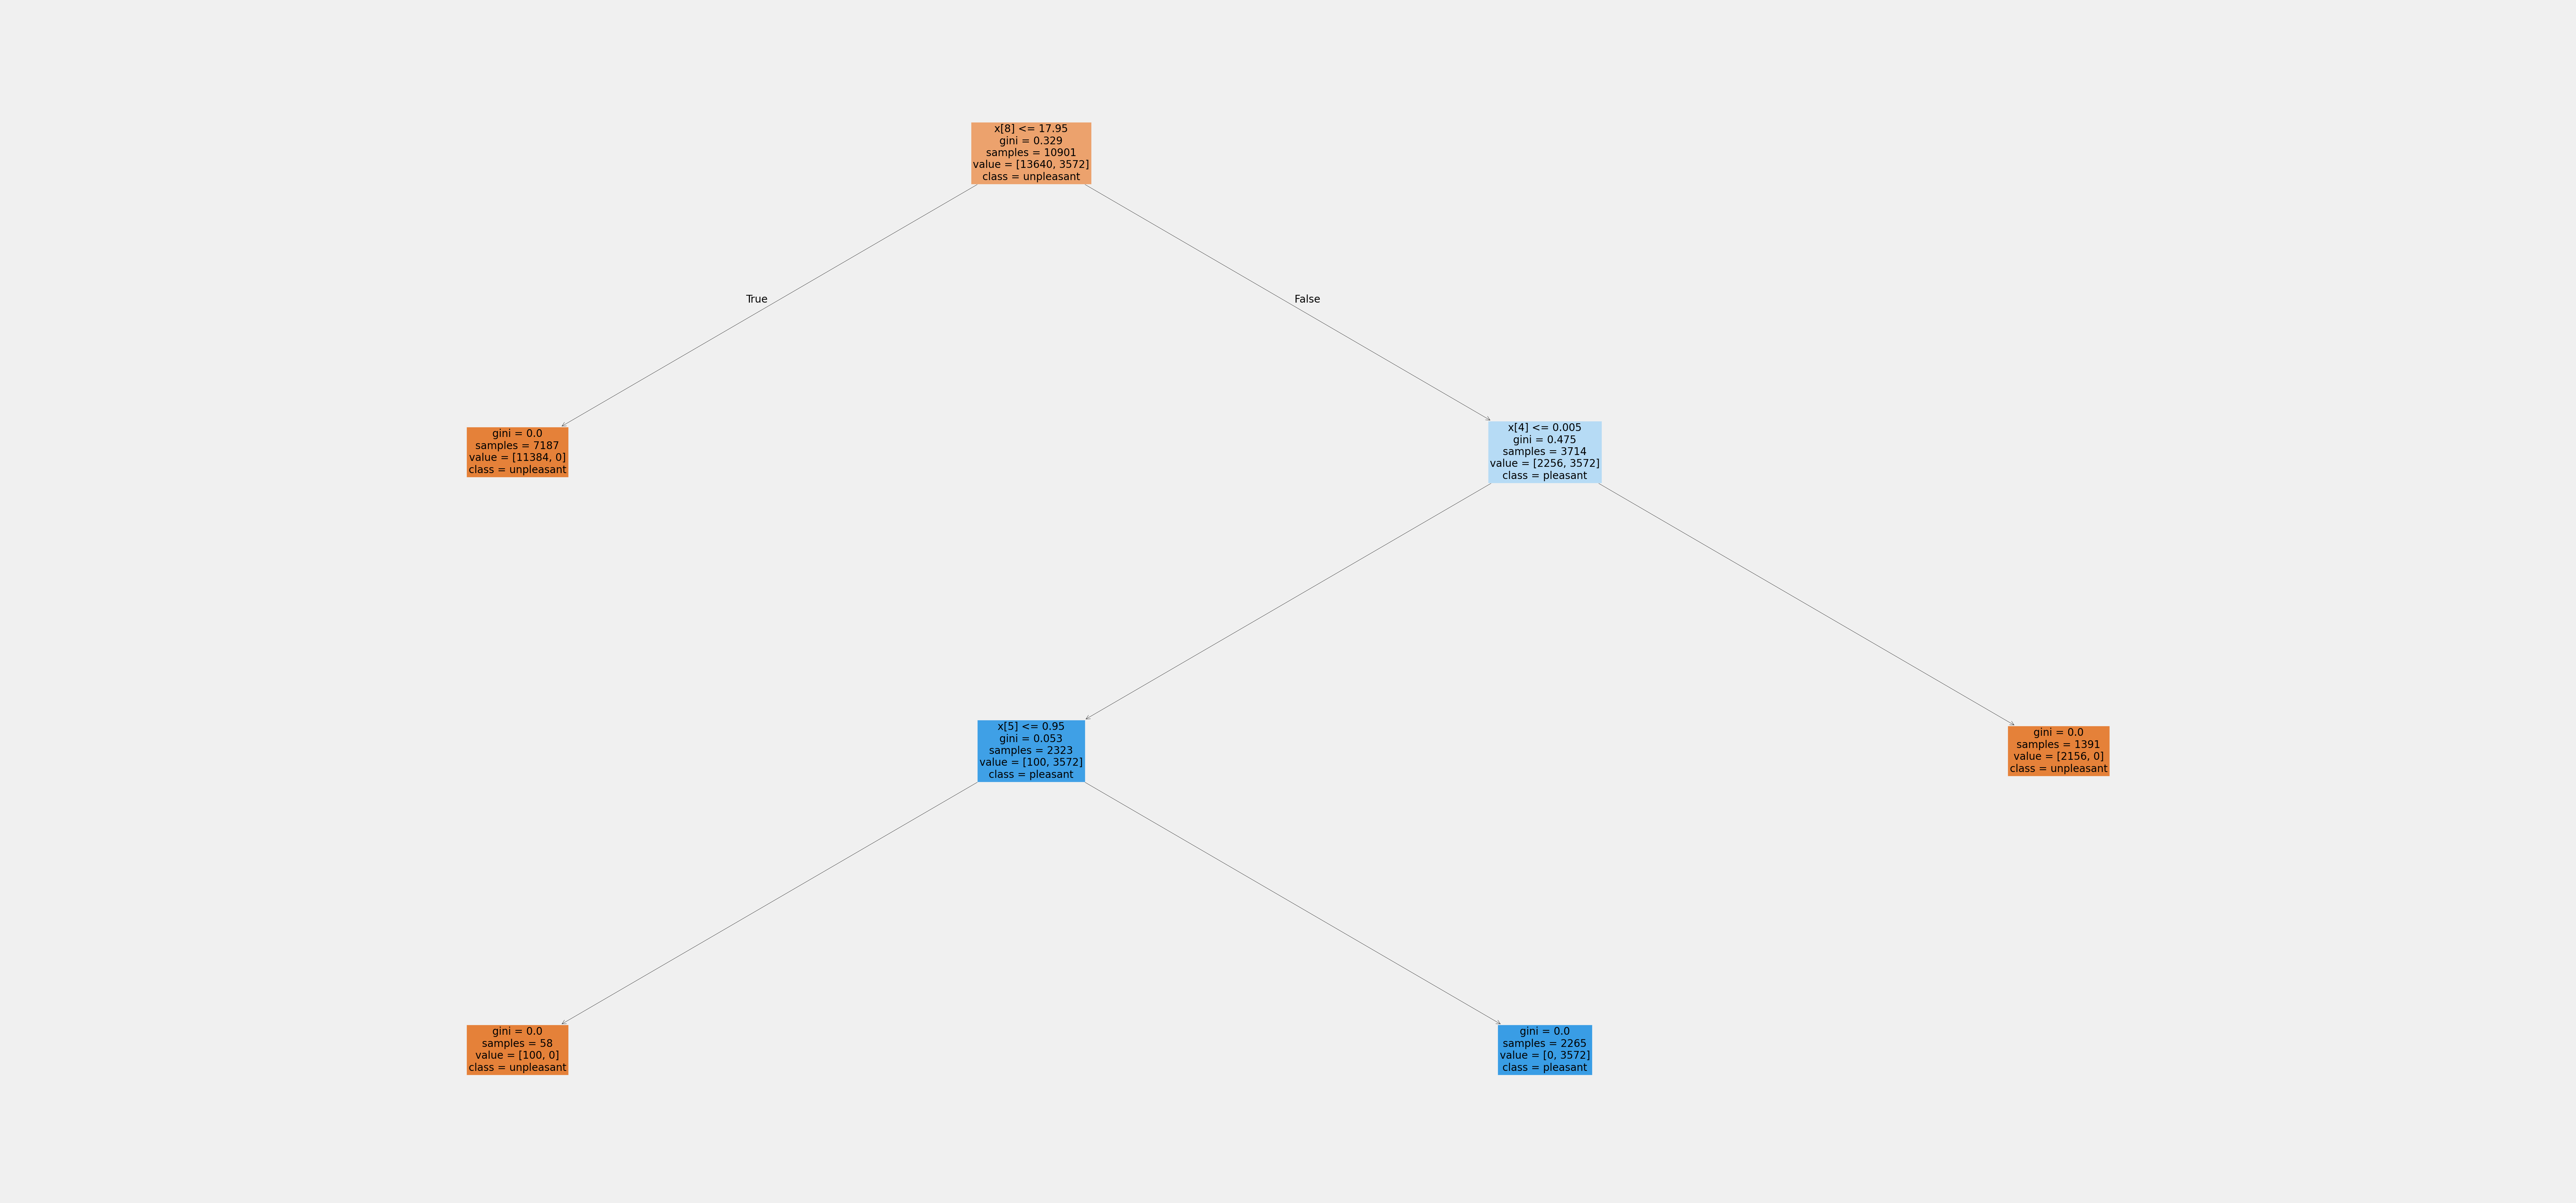

In [440]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf6.estimators_[tree_index], fontsize = 20, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show()

In [442]:
fig.savefig(f"{path}/Maastricht_optimization.png")

##### 6.1.2 Feature Importances

In [446]:
# Create a list of the columns containing "MAASTRICHT" in their names

MAASTRICHT_list = list(x for x in df_climate.columns if x.find('MAASTRICHT') >=0)
MAASTRICHT_list

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [448]:
# Create a list of weather features

weather_feature_list = [feature.replace('MAASTRICHT_', '') for feature in MAASTRICHT_list]
weather_feature_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [450]:
# Retrieve feature importances from the trained model
newarray = clf6.feature_importances_
print(clf6.feature_importances_.shape)
newarray

(9,)


array([3.77520962e-06, 0.00000000e+00, 0.00000000e+00, 4.04672822e-06,
       4.57359535e-01, 3.20700352e-02, 0.00000000e+00, 0.00000000e+00,
       5.10562608e-01])

In [452]:
important = pd.Series(newarray, index = weather_feature_list)
important = important.sort_values(ascending = False)
important

temp_max            0.510563
precipitation       0.457360
sunshine            0.032070
global_radiation    0.000004
cloud_cover         0.000004
humidity            0.000000
pressure            0.000000
temp_mean           0.000000
temp_min            0.000000
dtype: float64

In [454]:
# Create a df to associate weather features with their importances

df_importance = pd.DataFrame({
    'Weather Feature': weather_feature_list,
    'Importance': newarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)
df_importance

Weather Feature  Importance
8          temp_max    0.510563
4     precipitation    0.457360
5          sunshine    0.032070
3  global_radiation    0.000004
0       cloud_cover    0.000004
1          humidity    0.000000
2          pressure    0.000000
6         temp_mean    0.000000
7          temp_min    0.000000

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


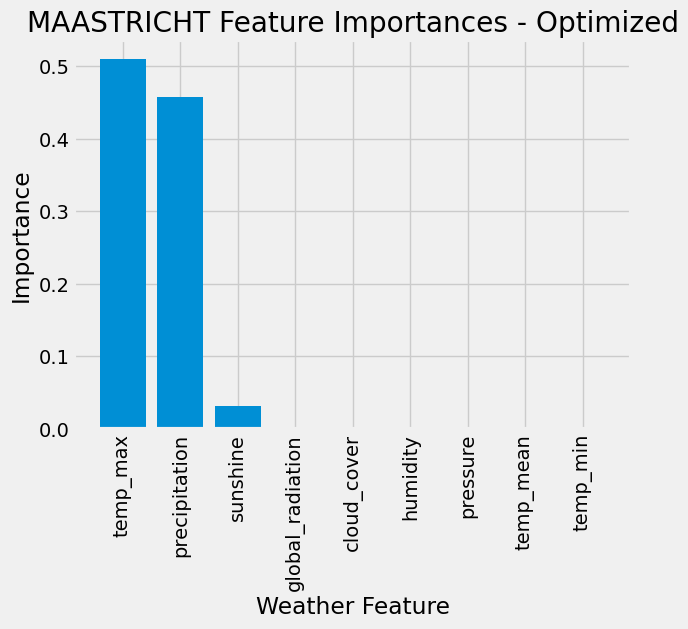

In [456]:
%matplotlib inline

plt.style.use('fivethirtyeight')
print(weather_feature_list)

plt.bar(df_importance['Weather Feature'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Feature')
plt.ylabel('Importance')
plt.title('MAASTRICHT Feature Importances - Optimized')

plt.savefig(os.path.join(path,'MAASTRICHT Feature_Importances-Optimized.png'), bbox_inches='tight')

plt.show()